# Analysis 1 - Break Even Analysis

**Problem :** The owner of a relatively small business is trying to determine the breakeven level of sales of the company’s single product.  The fixed cost of manufacturing this product each month is $5,000. The variable cost of producing this product is $100 per unit.  The current selling price is $115.  Using historical data on selling price and monthly demand, the owner fit the following function relating demand and selling price:

                                                         **D= 0.06S^2- 35S+ 4900**
                                                         
Assume for now that this business can meet the demand for its product each month.  Your goal is to build a model that will allow you to do things like find the break even selling price (i.e. the value of selling price that gives a profit of zero) and do some sensitivity analysis to some of the key inputs.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from whatif import Model
from whatif import get_sim_results_df
from scipy.optimize import bisect
import seaborn as sns

**Define Function for break even analysis** - **1a – Base Model**

In [5]:
# Create Base Model
class SingleProductSPF(Model):
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, 
                 spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic

    def demand(self):
        return self.spf_quadratic * self.selling_price**2 + self.spf_linear * self.selling_price + self.spf_constant

    def profit(self):
        return (self.selling_price - self.var_cost) * self.demand() - self.fixed_cost
    
    def total_cost(self):
        return self.fixed_cost + self.var_cost * self.demand()
    
# Initialize the model
model = SingleProductSPF()

# Check value for Selling Price = $115
model.selling_price = 115
print(f"Demand: {model.demand():.2f}")
print(f"Profit: ${model.profit():.2f}")

Demand: 1668.50
Profit: $20027.50


**1b – 1-way Data Table**

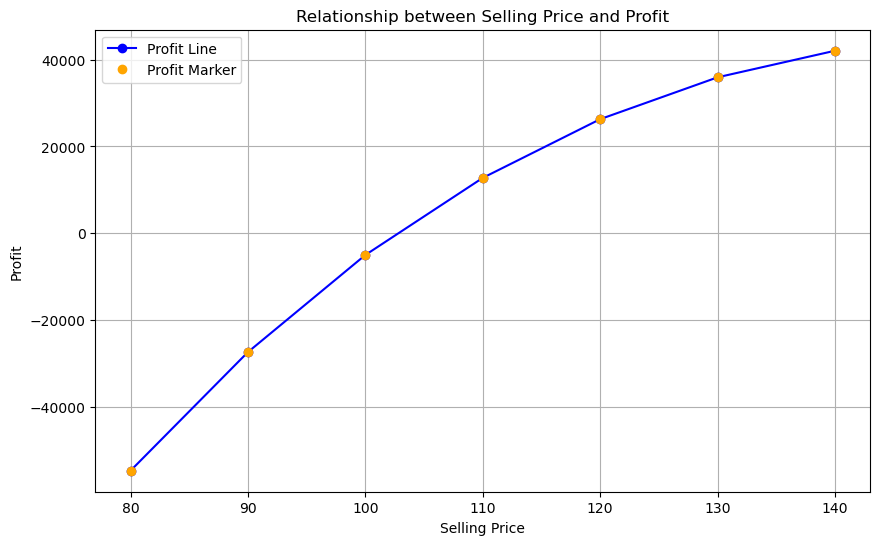

In [6]:
# Define the input range for selling price
selling_prices = list(range(80, 141, 10))

# Define the scenario inputs selling price
scenario_inputs = {'selling_price': selling_prices}

# Define the outputs 
outputs = ['profit', 'demand']

# Create the one-way data table
data_table = model.data_table(scenario_inputs, outputs)
data_table

# Plotting the relationship between selling price and profit 
plt.figure(figsize=(10, 6))
plt.plot(data_table['selling_price'], data_table['profit'], marker='o', color='blue', linestyle='-', label='Profit Line')
plt.plot(data_table['selling_price'], data_table['profit'], marker='o', color='orange', linestyle='none', label='Profit Marker')
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Relationship between Selling Price and Profit')
plt.legend()
plt.grid(True)
plt.show()

**Explanation - Is it linear? Is it nonlinear?**

The graph showing a non-linear positive correlation relationship between Selling price & profit. As the selling price increases, the profit also rises, indicating that higher prices lead to higher profits. 

**1c – Break Even** - Use our goal_seek function to find the break even selling price between $80 and $140. 

In [7]:
# Find the break-even selling price
break_even_price = model.goal_seek('profit', 0, 'selling_price', 80, 140)
print(f"Break Even Selling Price: ${break_even_price:.2f}")

Break Even Selling Price: $102.58


**1d – 2-way Data Table**

In [8]:
# Define the input ranges for selling price and variable production cost
selling_prices = list(range(80, 141, 10))
var_costs = list(range(85, 111, 5))

# Define the scenario inputs selling price and variable production cost
scenario_inputs = {'selling_price': selling_prices, 'var_cost': var_costs}

# Define the outputs
outputs = ['profit', 'total_cost']

# Create the 2-way data table
data_table_2way = model.data_table(scenario_inputs, outputs)
data_table_2way


,selling_price,var_cost,profit,total_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0
5,80,110,-79520.0,278240.0
6,90,85,6180.0,195060.0
7,90,90,-5000.0,206240.0
8,90,95,-16180.0,217420.0
9,90,100,-27360.0,228600.0


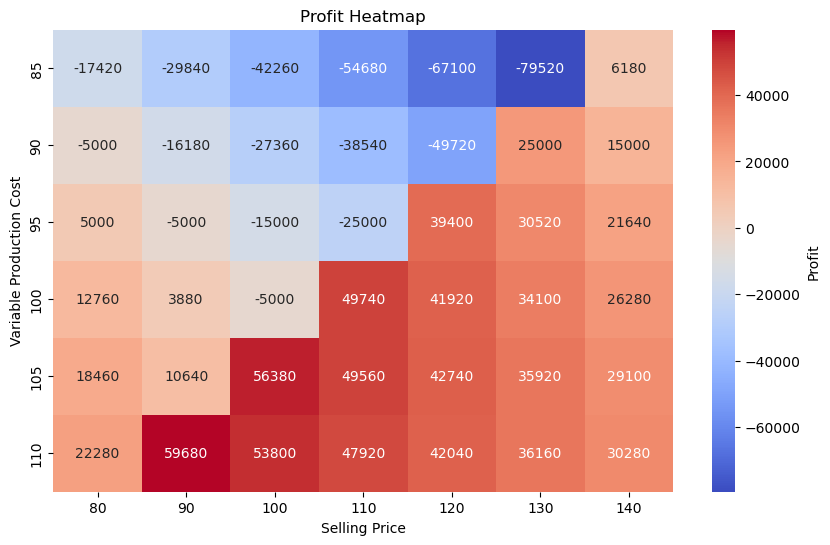

In [9]:
# Shape the two-way data table for plotting
profit_values = data_table_2way['profit'].values.reshape(len(var_costs), len(selling_prices))

# Create a heatmap to plot how price and variable cost impact profit
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(profit_values, cmap='coolwarm', annot=True, fmt=".0f", xticklabels=selling_prices, yticklabels=var_costs)
plt.xlabel('Selling Price')
plt.ylabel('Variable Production Cost')
plt.title('Profit Heatmap')

# Add color bar label
cb = heatmap.collections[0].colorbar
cb.set_label('Profit')

plt.show()

**Explanation**  - how price and variable production cost impact profit.

The heatmap illustrates the impact of Selling Price and Variable Production Cost on Profit, where blue represents lower profits or losses and red represents higher profits. As the Selling Price increases from 80 to 140, profits generally rise, evident from the shift in color from blue to red across the columns. Conversely, as the Variable Production Cost increases from 85 to 110, profits tend to decrease, shown by the transition from red to blue down the rows. The highest profits occur when the Selling Price is high and the Variable Production Cost is low, indicated by the darkest red cells. 

Conversely, the greatest losses occur when the Selling Price is low and the Variable Production Cost is high, marked by the darkest blue cells. For example, at a Selling Price of 140 and a Variable Production Cost of 85, the profit is 6180, showing moderate profit, while at a Selling Price of 90 and a Variable Production Cost of 110, the profit is significantly higher at 59680, indicating substantial profit. 

**1e – Digging deeper** - Now let’s explore this simple model a little bit further. Please do the following:

A) Redo the Goal Seek but instead of using $80-$140 as your search range, use $80-$250. What happens? Why do you think this happens?

B) Redo your 1-way data table and associated selling price vs profit plot but use $80-$250 as your input range. Now, why do you think that your Goal Seek failed?

In [10]:
# Define the broader range of selling prices
selling_prices_extended = list(range(80, 251, 10))

# Define the scenario inputs with the extended selling price range
scenario_inputs_extended = {'selling_price': selling_prices_extended}

# Perform goal seek with the extended range
break_even_selling_price_extended = model.goal_seek('profit', 0, 'selling_price', 80, 250)

# Print the break-even selling price
print("Break-even Selling Price (Extended Range):", break_even_selling_price_extended)

Break-even Selling Price (Extended Range): None


In [11]:
# Define the input range for selling price from $80 to $250
selling_prices_extended = list(range(80, 251, 10))

# Define the scenario inputs with the extended selling price range
scenario_inputs_extended = {'selling_price': selling_prices_extended}

# Define the outputs (profit)
outputs = ['profit']

# Create the 1-way data table with the extended input range
data_table_1way_extended = model.data_table(scenario_inputs_extended, outputs)
data_table_1way_extended


,selling_price,profit
0,80,-54680.0
1,90,-27360.0
2,100,-5000.0
3,110,12760.0
4,120,26280.0
5,130,35920.0
6,140,42040.0
7,150,45000.0
8,160,45160.0
9,170,42880.0


**Explanation of why it got failed:**

When we extend the range from $80-$140 to $80-$250 in the Goal Seek, This could fail due to model complexity,  constraints or limitations inherent in the model. The broader range introduces additional complexities and challenges, making it more difficult for the model algorithm to efficiently navigate and identify an optimal solution. 

**1f – Simulation** - Let’s add some uncertainty to the variable cost. Specifically, let’s model it with a uniform distribution between (80, 120). 

Use simulate function to simulate this and answer the following questions:

1)Create a histogram of profit?

2)What is the probability that profit is negative based on our simulation?


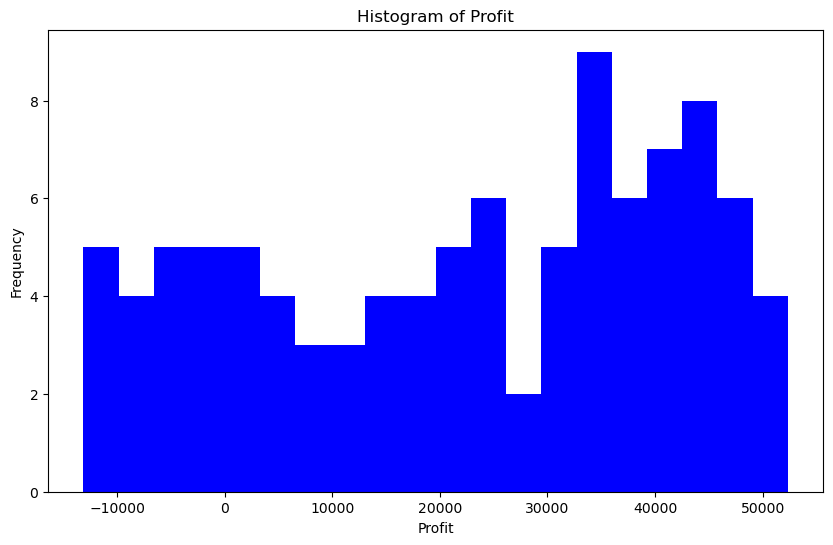

In [12]:
# Define the number of simulations checking for 100 scenarios
num_simulations = 100

# Define the uncertainty in variable production cost
random_inputs = {'var_cost': np.random.uniform(80, 120, size=num_simulations)}

# Define the outputs (profit)
outputs = ['profit']

# Simulate the model with uncertainty
sim_results = model.simulate(random_inputs, outputs)

# Extract profits from simulation results
profits = [result['output']['profit'] for result in sim_results]

# Plot histogram of profits
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=20, color='Blue')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()


In [13]:
# Calculate the probability of negative profit
prob_negative_profit = np.mean([profit < 0 for profit in profits])
print("Probability of Negative Profit:", prob_negative_profit)

Probability of Negative Profit: 0.19


**Explanation:** The simulation suggests that there is a 19% chance of encountering a negative profit, indicating that the business faces a considerable risk of operating at a loss. 